<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


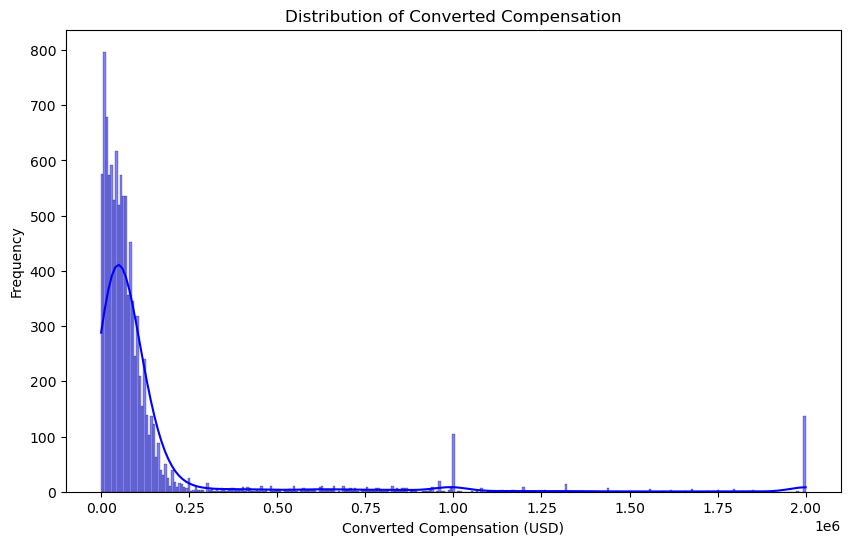

In [4]:
# Remove duplicate rows
df_no_dupes = df.drop_duplicates()

# Plot the distribution curve for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
sns.histplot(df_no_dupes['ConvertedComp'], kde=True, color='blue')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()


Plot the histogram for the column `ConvertedComp`.


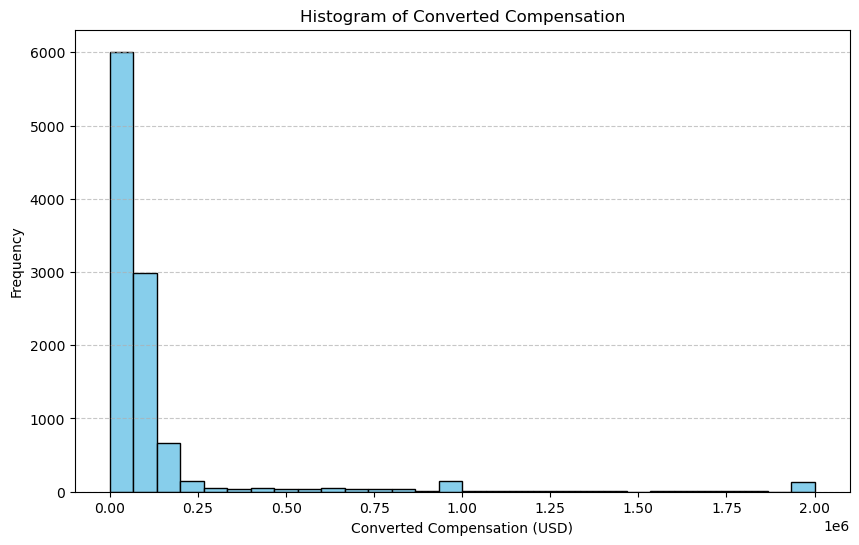

In [5]:
# Plot the histogram for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
plt.hist(df_no_dupes['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


What is the median of the column `ConvertedComp`?


In [6]:
# Calculate the median of the 'ConvertedComp' column
median_converted_comp = df_no_dupes['ConvertedComp'].median()

print(f"The median of the 'ConvertedComp' column: {median_converted_comp}")


The median of the 'ConvertedComp' column: 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# Count the number of responders who identified themselves only as a man
man_count = df_no_dupes[df_no_dupes['Gender'] == 'Man'].shape[0]

print(f"The number of responders who identified themselves only as a man: {man_count}")


The number of responders who identified themselves only as a man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# Filter the DataFrame for responders who identified themselves only as a woman
woman_data = df_no_dupes[df_no_dupes['Gender'] == 'Woman']

# Calculate the median 'ConvertedComp' for responders identified as a woman
median_converted_comp_woman = woman_data['ConvertedComp'].median()

print(f"The median ConvertedComp of responders identified themselves only as a woman: {median_converted_comp_woman}")


The median ConvertedComp of responders identified themselves only as a woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
# Calculate the five-number summary for the 'Age' column
five_number_summary_age = df_no_dupes['Age'].describe(percentiles=[.25, .5, .75])

# Calculate the minimum and maximum values for the 'Age' column
min_age = df_no_dupes['Age'].min()
max_age = df_no_dupes['Age'].max()

print("Five-Number Summary for the 'Age' column:")
print(five_number_summary_age)
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")


Five-Number Summary for the 'Age' column:
count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64
Minimum Age: 16.0
Maximum Age: 99.0


Plot a histogram of the column `Age`.


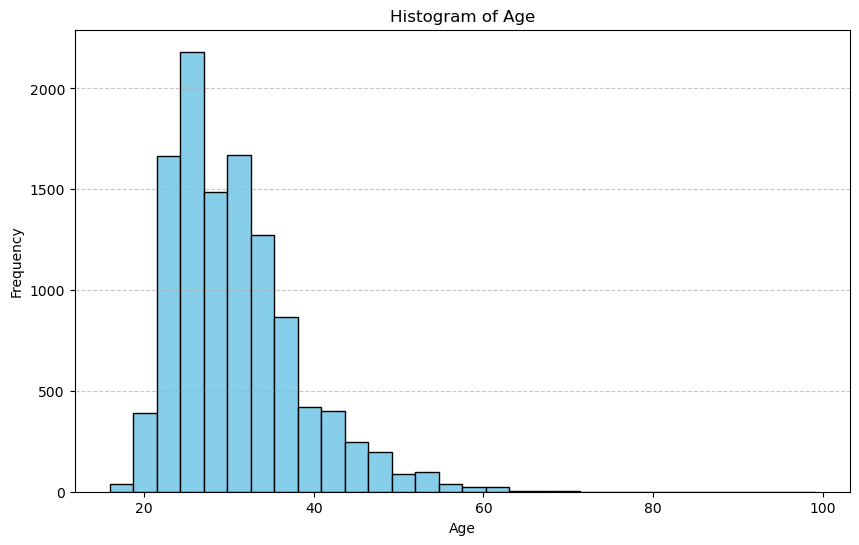

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df_no_dupes['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [12]:
#FOR QUIZ: age group with highest num of respondents
bins = [16, 24, 32, 40, 48, 99]
labels = ['16-24', '24-32', '32-40', '40-48', '48-99']

# Create a new column 'AgeGroup' to store the age groups
df_no_dupes['AgeGroup'] = pd.cut(df_no_dupes['Age'], bins=bins, labels=labels, right=False)

# Count the number of respondents in each age group
age_group_counts = df_no_dupes['AgeGroup'].value_counts()

# Identify the age group with the highest number of respondents
most_common_age_group = age_group_counts.idxmax()

print(f"The age group with the highest number of respondents: {most_common_age_group}")

The age group with the highest number of respondents: 24-32


In [13]:
#FOR QUIZ: Calculate the median age of survey respondents
median_age = df_no_dupes['Age'].median()

print(f"The median age of survey respondents: {median_age}")

The median age of survey respondents: 29.0


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


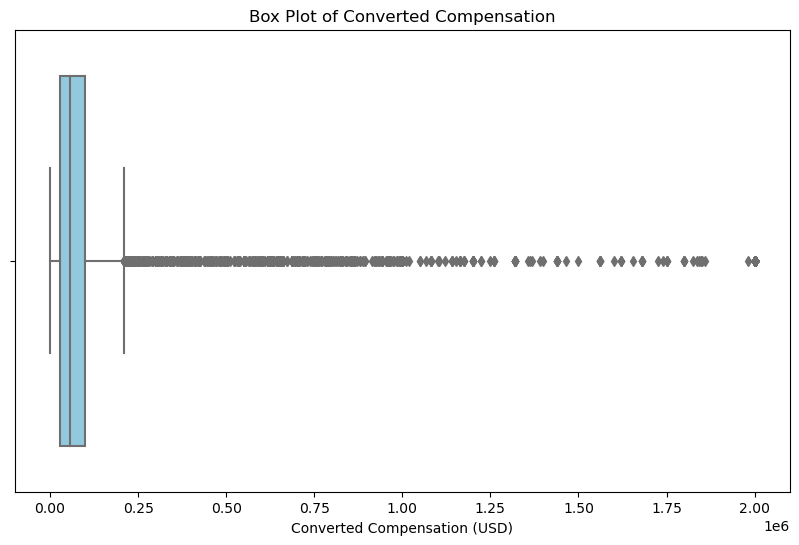

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_dupes['ConvertedComp'], color='skyblue')
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [21]:
median_converted_comp = df['ConvertedComp'].median()
df['ConvertedComp'] = df['ConvertedComp'].fillna(median_converted_comp)

# Display the DataFrame with NaN values replaced by median
print("DataFrame with NaN values replaced by median:")
print(df)

DataFrame with NaN values replaced by median:
       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
3              16  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
...           ...                             ...      ...   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   
11397       25142  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month

In [22]:
# Calculate the first quartile (Q1)
q1 = np.percentile(df_no_dupes['ConvertedComp'], 25)

# Calculate the third quartile (Q3)
q3 = np.percentile(df_no_dupes['ConvertedComp'], 75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

print(f"The Interquartile Range (IQR) for the 'ConvertedComp' column: {iqr}")


The Interquartile Range (IQR) for the 'ConvertedComp' column: nan


Find out the upper and lower bounds.


In [24]:
# Calculate the first quartile (Q1)
q1 = np.percentile(df_no_dupes['ConvertedComp'], 25)

# Calculate the third quartile (Q3)
q3 = np.percentile(df_no_dupes['ConvertedComp'], 75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Calculate lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound for 'ConvertedComp': {lower_bound}")
print(f"Upper Bound for 'ConvertedComp': {upper_bound}")


Lower Bound for 'ConvertedComp': nan
Upper Bound for 'ConvertedComp': nan


Identify how many outliers are there in the `ConvertedComp` column.


In [25]:
# Identify outliers
outliers = df_no_dupes[(df_no_dupes['ConvertedComp'] < lower_bound) | (df_no_dupes['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print(f"Number of outliers in 'ConvertedComp': {num_outliers}")


Number of outliers in 'ConvertedComp': 0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [26]:
# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Calculate lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers and create a new DataFrame
df_no_outliers = df_no_dupes[(df_no_dupes['ConvertedComp'] >= lower_bound) & (df_no_dupes['ConvertedComp'] <= upper_bound)]

# Display the new DataFrame without outliers
print("New DataFrame without outliers:")
print(df_no_outliers)


New DataFrame without outliers:
Empty DataFrame
Columns: [Respondent, MainBranch, Hobbyist, OpenSourcer, OpenSource, Employment, Country, Student, EdLevel, UndergradMajor, EduOther, OrgSize, DevType, YearsCode, Age1stCode, YearsCodePro, CareerSat, JobSat, MgrIdiot, MgrMoney, MgrWant, JobSeek, LastHireDate, LastInt, FizzBuzz, JobFactors, ResumeUpdate, CurrencySymbol, CurrencyDesc, CompTotal, CompFreq, ConvertedComp, WorkWeekHrs, WorkPlan, WorkChallenge, WorkRemote, WorkLoc, ImpSyn, CodeRev, CodeRevHrs, UnitTests, PurchaseHow, PurchaseWhat, LanguageWorkedWith, LanguageDesireNextYear, DatabaseWorkedWith, DatabaseDesireNextYear, PlatformWorkedWith, PlatformDesireNextYear, WebFrameWorkedWith, WebFrameDesireNextYear, MiscTechWorkedWith, MiscTechDesireNextYear, DevEnviron, OpSys, Containers, BlockchainOrg, BlockchainIs, BetterLife, ITperson, OffOn, SocialMedia, Extraversion, ScreenName, SOVisit1st, SOVisitFreq, SOVisitTo, SOFindAnswer, SOTimeSaved, SOHowMuchTime, SOAccount, SOPartFreq, SOJobs

In [27]:
#FOR QUIZ: Calculate the median of the cleaned data
median_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].median()

print(f"The median ConvertedComp after removing outliers: {median_converted_comp_no_outliers}")

The median ConvertedComp after removing outliers: nan


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [29]:
# Get the correlation between 'Age' and all other numerical columns
correlation_age = df.corrwith(df['Age'], numeric_only=True)

# Display the correlation results
print("Correlation between 'Age' and other numerical columns:")
print(correlation_age)

Correlation between 'Age' and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.103232
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
